# Resizing images

- 1-NN algorithm
- Negative of images
- Gamma correction

todo 
- K-NN algorithm

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

### How to convert Numpy array to PIL image applying matplotlib colormap

[source](https://stackoverflow.com/questions/10965417/how-to-convert-numpy-array-to-pil-image-applying-matplotlib-colormap)

- First ensure your numpy array, myarray, is normalised with the max value at 1.0.
- Apply the colormap directly to myarray.
- Rescale to the 0-255 range.
- Convert to integers, using np.uint8().
- Use Image.fromarray().

In [2]:
def rescaleImage(img,S=256):
    """ make all the values in the image in the scale 0..S, so could be fit within uint 
        input:
        -------------
          img : numpy array
          S   : scale parameter
        return 
          numpy array after rescaling the image
    """
    assert S<=256
    ret=np.zeros(img.shape)
    ret=S*((img-img.min())/float(1+img.max()-img.min()))
    return np.uint8(ret)
def negativeImage(img):
    """return negative of the image"""
    return 255-img
def adjust_gamma(img, gamma=1.0):
    """Gamma Correction
        input:
        ---------------
            img   : numpy array
            gamma : Gamma correction parameter
        
        output: return numpy array after applying Gamma correction
    """
    invGamma=1/gamma
    ret=img.copy()
    ret=ret/256.
    return np.uint8(256*(np.power(ret,invGamma)))

In [3]:
def mapCell(nh,nw,oh,ow,i,j):
    """ map (i,j)-->(oi,oj)
    Input:
    ---------------
        nh,nw: New dimensions of the image
        oh,ow: Origin/old dimensions of the image
        i,j  : coordinates of the cell in the new image
    return:
    -----------------
        (oi,oj): the corresponding coordinates in the origin image
    """
    return int(i*oh/float(nh)),int(j*ow/float(nw))
def resizeImage_NN(img,nh,nw,oh,ow):
    """ Resize image using 1-Nearest Neighbor Algorithm
        Input:
        --------------
            img: numpy array of shape (h,w) or (h,w,3)
            nh,nw: New dimensions of the image
            oh,ow: Origin/old dimensions of the image
        return numpy array with values of type uint, represents the image in the new dimensions
    """
    newdims=[nh,nw]+list(img.shape[2:])  # if the image RGB then add the third dimension (will be 3)
    newimg=np.zeros(tuple(newdims))
    for i in range(nh):
        for j in range(nw):
            ix,jx=mapCell(nh,nw,oh,ow,i,j)
            newimg[i,j]=img[ix,jx]
    return np.uint8(newimg)

In [4]:
s=(1,2,3)
s[1:]

(2, 3)

8 (480, 360) JPEG


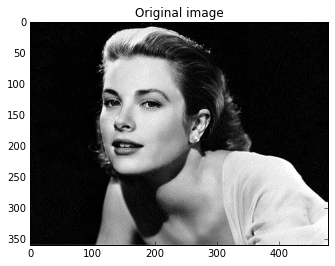

In [5]:
from PIL import Image
jpgfile = Image.open("./data/grace.jpg")
w,h = jpgfile.size

img=np.array(jpgfile)
img=rescaleImage(img,256)
print jpgfile.bits, jpgfile.size, jpgfile.format
plt.figure("Original image")
plt.title("Original image")
imshow(img)

## Change the size of the image using 1-NN

- oh,ow origin dimensions
- nh,nw new dimensions

$O(i,j)=I(i*oh/nh,j*ow/nw)$

### Shrink the image by 1.7

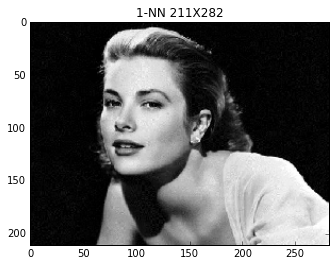

In [6]:
nh,nw=int(h/1.7),int(w/1.7)
newimg=resizeImage_NN(img,nh,nw,h,w)

plt.figure("1-NN {}X{}".format(nh,nw))
plt.title("1-NN {}X{}".format(nh,nw))
imshow(newimg)

### Strech the image by 2.3

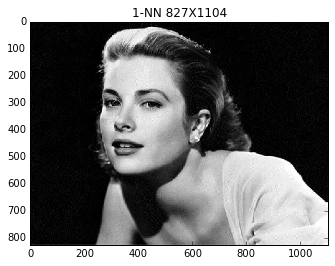

In [7]:
nh,nw=int(h*2.3),int(w*2.3)
newimg=resizeImage_NN(img,nh,nw,h,w)

plt.figure("1-NN {}X{}".format(nh,nw))
plt.title("1-NN {}X{}".format(nh,nw))
imshow(newimg)

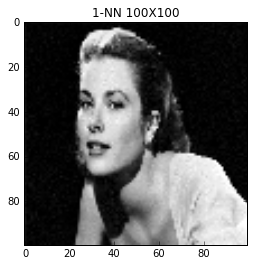

In [8]:
nh,nw=100,100
newimg=resizeImage_NN(img,nh,nw,h,w)

plt.figure("1-NN {}X{}".format(nh,nw))
plt.title("1-NN {}X{}".format(nh,nw))
imshow(newimg)

## Negative
$O=255-I$

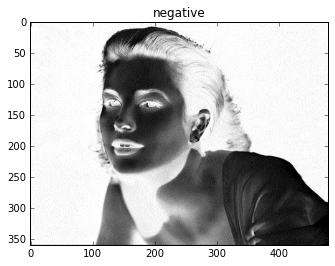

In [9]:
img_negative=negativeImage(img)
plt.figure("negative")
plt.title("negative")
imshow(img_negative)

## Gamma Correction

$O=I^{1/G}$

<img src="http://xahlee.info/img/i/gamma_function_graph.svg" />

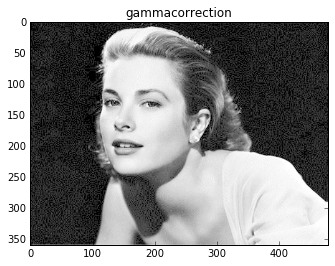

In [10]:
img_gammacorrection=adjust_gamma(img,2.3)
img_gammacorrection=rescaleImage(img_gammacorrection,256)
plt.figure("gammacorrection")
plt.title("gammacorrection")
imshow(img_gammacorrection)